# Single item characterisation plots

Collection of random plots for chapter 4.



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import scipy.cluster.hierarchy as sh
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress
import collections
import cPickle as pickle

from experimentlauncher import ExperimentLauncher
from dataio import DataIO
import plots_experimental_data
import em_circularmixture_parametrickappa

import hierarchicalrandomnetwork

# import matplotlib.animation as plt_anim
from mpl_toolkits.mplot3d import Axes3D

import re
import inspect
import imp

import utils
import load_experimental_data

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

# Fisher Information comparison

OLD STUFF WAS:
* Fisher Information stuff is in: [../fisherinfo_new_2016/notebook_fisher_fits_2016.ipynb](../fisherinfo_new_2016/notebook_fisher_fits_2016.ipynb)
* Fisher Information, 2d plots are in: [../fisherinfo_new_2016/notebook_fisher_random_large_2try_310816.ipynb](../fisherinfo_new_2016/notebook_fisher_random_large_2try_310816.ipynb)


### single network plot

Use large sweep from `generator_fisher2016_random_Mratio_5try_240818.py`. 

Reloaded in [this notebook](../fisherinfo_new_2016/notebook_fisher2016_random_Mratio_5try_240818.ipynb)

## 2d plot ratio / M

Also in [same notebook](../fisherinfo_new_2016/notebook_fisher2016_random_Mratio_5try_240818.ipynb)

# Receptive field size heuristic

Figure 4.4 is in [this notebook](../fisherinfo_new_2016/notebook_fisher_random_large_3try_220117_receptive_field_size.ipynb)

# Coverage of space effect 

Used in section 4.2.2 Coverage of space. Shows the dependence of the memory fidelity and average activation on the optimal density

### Population N=36

In [39]:
arguments_dict = dict(
    action_to_do='launcher_do_simple_run',
    inference_method='none',
    N=500,
    num_samples=50,
    M=6**2,
    label='thesis_fisherinfo_fit_1obj_smallM',
    output_directory='./Experiments/fisherinfo_singleitem/thesisrerun_fisherinfo_fit_1obj_050816',
    T=1,
    num_repetitions=5,
    renormalize_sigma=None,
    autoset_parameters=None,
    code_type='conj',
    ratio_conj=1.,
    sigmax=0.1,
    sigmay=0.000001,
    sigma_output=0.0,
    selection_num_samples=1,
    selection_method='last',
    slice_width=0.07,
    burn_samples=100,
    enforce_min_distance=0.17,
    specific_stimuli_random_centers=None,
    stimuli_generation='random',
    stimuli_generation_recall='random',
    experiment_data_dir=os.path.normpath(os.path.join(os.environ['WORKDIR_DROP'], '../../experimental_data')),
)
with io.capture_output(display=False, stdout=True) as captured:
    experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
    sampler = experiment_launcher.all_vars['sampler']
    network = sampler.random_network

optimal_rc_scale = network.rc_scale[0]
print(optimal_rc_scale)

1.42841796875


In [44]:
dataio = DataIO(label='tiling_space_effect_M36', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Figures/thesis/single_item_characterisation')

=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Figures/thesis/single_item_characterisation/tiling_space_effect_M36-0b24a132-309e-4ebe-b7dd-0eeb8c1d4f47 ===


In [88]:
# 1D version
rcscale_space = np.array([0.5*optimal_rc_scale, optimal_rc_scale, 2*optimal_rc_scale, 4*optimal_rc_scale])
all_df_precisions_2 = []
all_networks_2 = []

for i, rcscale in enumerate(rcscale_space):
    arguments_dict['inference_method'] = 'sample'
    arguments_dict['rc_scale'] = rcscale
    if 'autoset_parameters' in arguments_dict:
        del arguments_dict['autoset_parameters']
    with io.capture_output(display=False, stdout=True) as captured:
        experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
        sampler = experiment_launcher.all_vars['sampler']
        all_networks_2.append(sampler.random_network)
        
    all_df_precisions_2.append(sampler.estimate_precision_per_angle(num_repetitions=100))

[100%] 4s                                                                     
[100%] 4s                                                                     
[100%] 4s                                                                     
[100%] 4s                                                                     


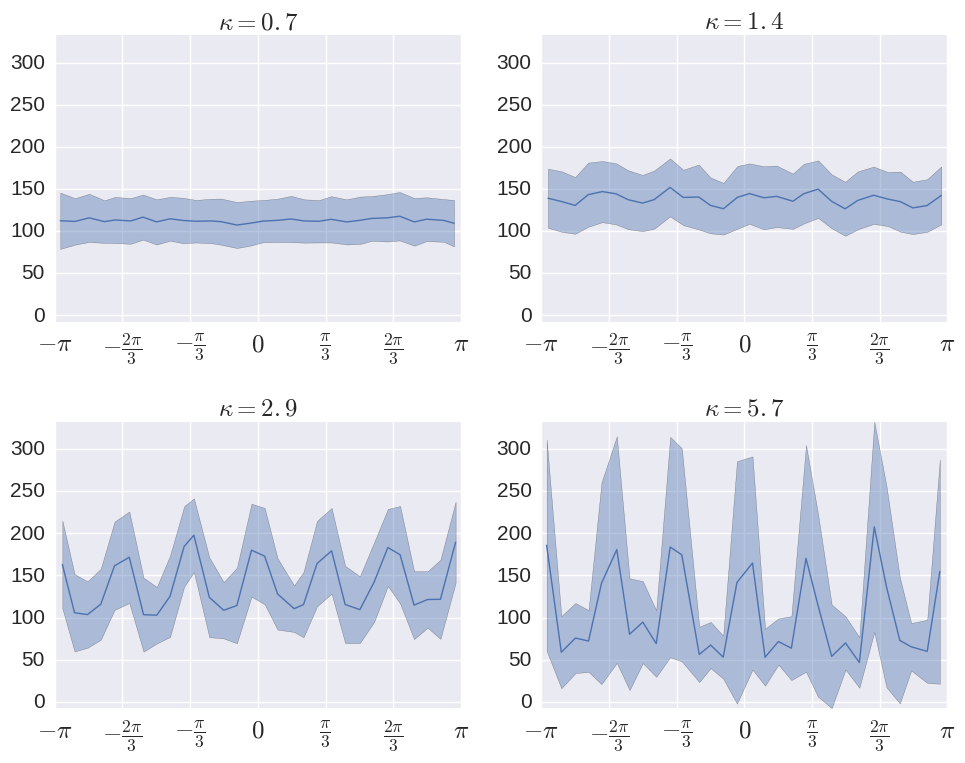

In [89]:
min_value = np.min([(df_precision.precisions - df_precision.precisions_std) for df_precision in all_df_precisions_2])
max_value = np.max([(df_precision.precisions + df_precision.precisions_std) for df_precision in all_df_precisions_2])

f, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, rcscale in enumerate(rcscale_space):
    sampler.plot_precision_per_angle(all_df_precisions_2[i], x='target', value='precisions', ax=axes[i])
    axes[i].set_title("$\kappa = %.1f$" % rcscale)
    axes[i].set_ylim(min_value, max_value)

plt.tight_layout()
f.savefig(dataio.create_formatted_filename("precision_per_angle_M36_{label}_{unique_id}.pdf"), bbox_inches='tight')

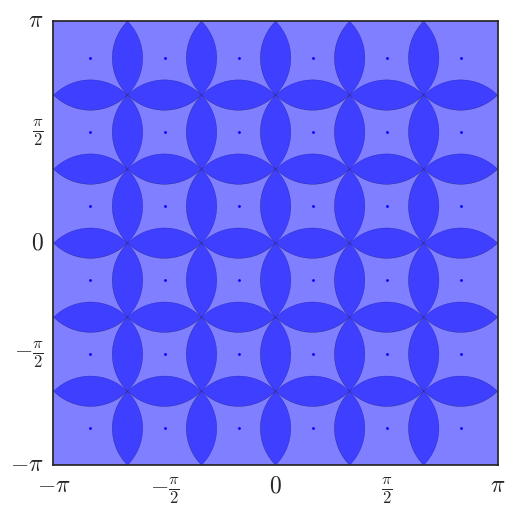

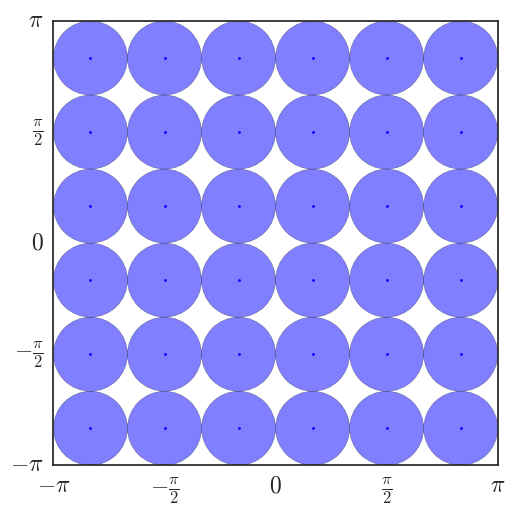

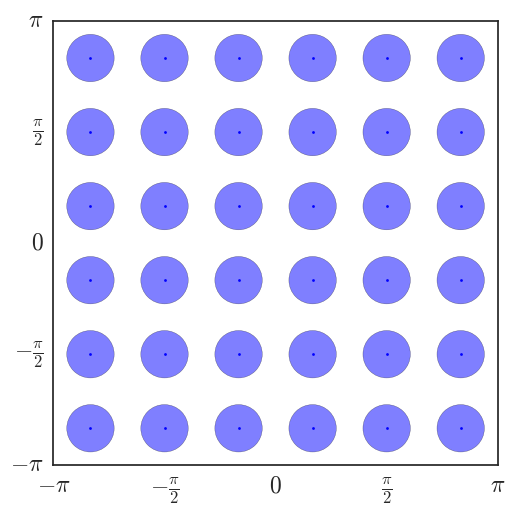

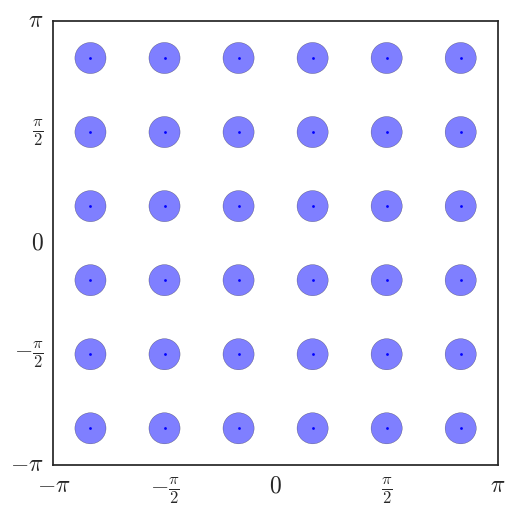

In [109]:
for i, rcscale in enumerate(rcscale_space):
    with sns.axes_style('white'):
        ax = all_networks_2[i].plot_coverage_feature_space(facecolor='blue')
        ax.set_xlabel('')
        ax.set_ylabel('')
#         ax.set_xticks([])
#         ax.set_yticks([])
        
        ax.figure.savefig(dataio.create_formatted_filename("population_coverage_rcscale%.2f_{label}.pdf" % (rcscale)), 
                  bbox_inches='tight')

In [ ]:
# 2D version
rcscale_space = np.array([0.5*optimal_rc_scale, optimal_rc_scale, 2*optimal_rc_scale, 4*optimal_rc_scale])
all_df_precisions_2d_2 = []

for i, rcscale in enumerate(rcscale_space):
    arguments_dict['inference_method'] = 'sample'
    arguments_dict['rc_scale'] = rcscale
    if 'autoset_parameters' in arguments_dict:
        del arguments_dict['autoset_parameters']
    with io.capture_output(display=False, stdout=True) as captured:
        experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
        sampler = experiment_launcher.all_vars['sampler']
        
    all_df_precisions_2d_2.append(sampler.estimate_precision_twoangles(num_repetitions=5))
    

-> init theta, feature 1 cued, time 1
Computing normalisations ...
... done
[100%] 1m49s                                                                  
-> init theta, feature 1 cued, time 1
Computing normalisations ...
... done
[100%] 1m50s                                                                  
-> init theta, feature 1 cued, time 1
Computing normalisations ...
... done


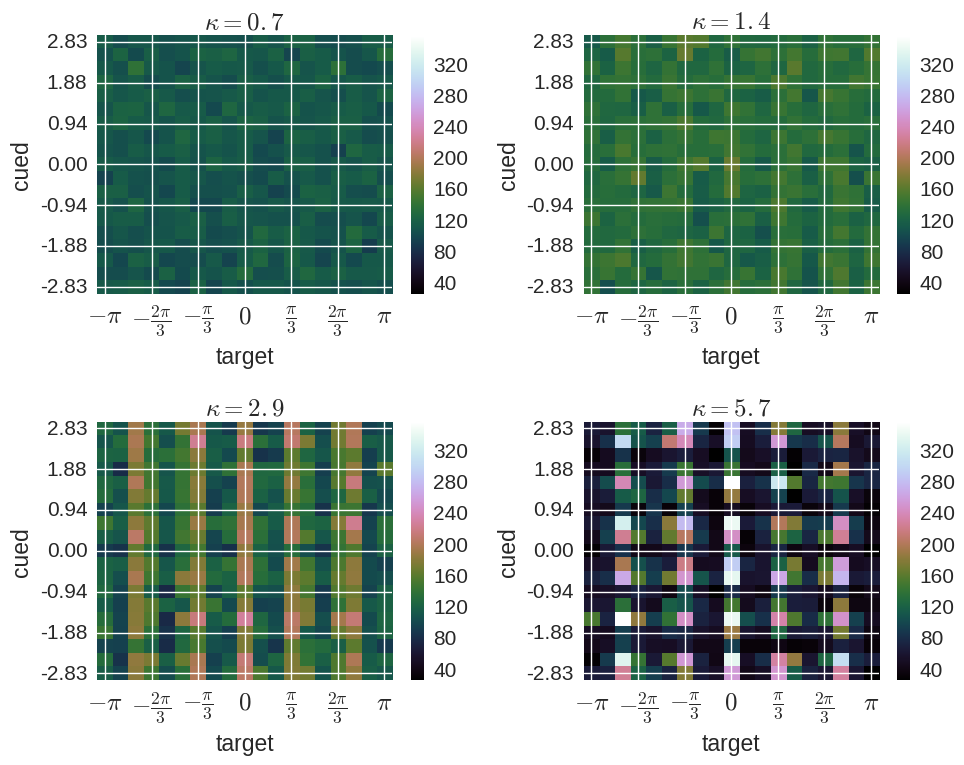

In [52]:
min_value = np.min([(df_precision.precisions) for df_precision in all_df_precisions_2d_2])
max_value = np.max([(df_precision.precisions) for df_precision in all_df_precisions_2d_2])

f, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, rcscale in enumerate(rcscale_space):
    sampler.plot_precision_twoangles(all_df_precisions_2d_2[i], value='precisions', ax=axes[i], 
                                     vmin=min_value, vmax=max_value)
    axes[i].set_title("$\kappa = {:.1f}$".format(rcscale))

plt.tight_layout()
f.savefig(dataio.create_formatted_filename("precision_twoangles_M36_{label}_{unique_id}.pdf"), bbox_inches='tight')

#### population M=100

Can't use M=196 because the noise is too messy.

In [37]:
# arguments_dict = dict(
#     action_to_do='launcher_do_simple_run',
#     inference_method='none',
#     N=500,
#     num_samples=50,
#     M=10**2,
#     label='thesis_fisherinfo_fit_1obj_smallM',
#     output_directory='./Experiments/fisherinfo_singleitem/thesisrerun_fisherinfo_fit_1obj_050816',
#     T=1,
#     num_repetitions=5,
#     renormalize_sigma=None,
#     autoset_parameters=None,
#     code_type='conj',
#     ratio_conj=1.,
#     sigmax=0.25,
#     sigmay=0.000001,
#     sigma_output=0.0,
#     selection_num_samples=1,
#     selection_method='last',
#     slice_width=0.07,
#     burn_samples=100,
#     enforce_min_distance=0.017,
#     specific_stimuli_random_centers=None,
#     stimuli_generation='random',
#     stimuli_generation_recall='random',
#     experiment_data_dir=os.path.normpath(os.path.join(os.environ['WORKDIR_DROP'], '../../experimental_data')),
# )
# with io.capture_output(display=False, stdout=True) as captured:
#     experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
#     sampler = experiment_launcher.all_vars['sampler']
#     network = sampler.random_network

# optimal_rc_scale = network.rc_scale[0]
# print(optimal_rc_scale)

3.15576171875


In [38]:
# dataio = DataIO(label='tiling_space_effect_M196', 
#                 calling_function='', 
#                 output_folder=os.environ['WORKDIR_DROP'] + '/Figures/thesis/single_item_characterisation')

=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Figures/thesis/single_item_characterisation/tiling_space_effect_M196-ec274cc3-e1f6-4ffb-b2bd-dd0bd94a01d6 ===


In [34]:
# # 1D version
# rcscale_space = np.array([0.3*optimal_rc_scale, optimal_rc_scale, 2*optimal_rc_scale, 4*optimal_rc_scale])
# all_df_precisions = []

# for i, rcscale in enumerate(rcscale_space):
#     arguments_dict['rc_scale'] = rcscale
#     arguments_dict['inference_method'] = 'sample'
#     if 'autoset_parameters' in arguments_dict:
#         del arguments_dict['autoset_parameters']
#     with io.capture_output(display=False, stdout=True) as captured:
#         experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
#         sampler = experiment_launcher.all_vars['sampler']
        
#     all_df_precisions.append(sampler.estimate_precision_per_angle(num_repetitions=100))

[100%] 4s                                                                     
[100%] 4s                                                                     
[100%] 4s                                                                     
[100%] 4s                                                                     


In [103]:
# min_value = np.min([(df_precision.precisions - df_precision.precisions_std) 
#                     for df_precision in all_df_precisions])
# max_value = np.max([(df_precision.precisions + df_precision.precisions_std) 
#                     for df_precision in all_df_precisions])

# f, axes = plt.subplots(2, 2, figsize=(10, 8))
# axes = axes.flatten()
# for i, rcscale in enumerate(rcscale_space):
#     sampler.plot_precision_per_angle(all_df_precisions[i], x='target', value='precisions', ax=axes[i])
#     axes[i].set_title("$\kappa = %.1f$" % rcscale)
#     axes[i].set_ylim(min_value, max_value)

# plt.tight_layout()
# f.savefig(dataio.create_formatted_filename("precision_per_angle_M100_{label}_{unique_id}.pdf"), bbox_inches='tight')

In [ ]:
# # 2D version
# rcscale_space = np.array([0.5*optimal_rc_scale, optimal_rc_scale, 2*optimal_rc_scale, 4*optimal_rc_scale])
# all_df_precisions_2d = []

# for i, rcscale in enumerate(rcscale_space):
#     arguments_dict['rc_scale'] = rcscale
#     if 'autoset_parameters' in arguments_dict:
#         del arguments_dict['autoset_parameters']
#     with io.capture_output(display=False, stdout=True) as captured:
#         experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
#         sampler = experiment_launcher.all_vars['sampler']
        
#     all_df_precisions_2d.append(sampler.estimate_precision_twoangles(num_repetitions=5))
    

In [ ]:
# min_value = np.min([(df_precision.precisions) for df_precision in all_df_precisions_2d])
# max_value = np.max([(df_precision.precisions) for df_precision in all_df_precisions_2d])

# f, axes = plt.subplots(2, 2, figsize=(10, 8))
# axes = axes.flatten()
# for i, rcscale in enumerate(rcscale_space):
#     sampler.plot_precision_twoangles(all_df_precisions_2d[i], value='precisions', ax=axes[i], 
#                                      vmin=min_value, vmax=max_value)
#     axes[i].set_title("$\kappa = {:.1f}$".format(rcscale))

# plt.tight_layout()
# f.savefig(dataio.create_formatted_filename("precision_twoangles_M100_{label}_{unique_id}.pdf"), bbox_inches='tight')

In [16]:
# # OLD: plots of mean activity per rcscale.

# def do_plot(network, ax=None):
#     (mean_activity, feature_space1, feature_space2) = network.get_mean_activity(precision=100, return_axes_vect=True)
#     activ_mean = np.mean(mean_activity)
#     activ_std = np.std(mean_activity.flatten())

#     cmap_div = sns.diverging_palette(h_neg=29, h_pos=265, s=80, l=85, sep=1, as_cmap=True, center='dark')
#     eps = max(4*activ_std, 1e-3)
#     # eps = activ_mean*1e-5

#     ax, im = utils.pcolor_2d_data(mean_activity, x=feature_space1, y=feature_space2, 
#                                   xlabel='Color', ylabel='Orientation', 
#                                   colorbar=True, ticks_interpolate=5, 
#                                   cmap="RdBu_r",
#                                   vmin=max(activ_mean - eps, 0), vmax=min(activ_mean + eps, 1),
#                                   ax_handle=ax
#                                  )
#     ax.set_xticklabels((r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'), rotation=0, fontsize=18)
#     ax.set_yticklabels((r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'), rotation=0)
    
#     return ax

# # rcscale_space = np.array([4.23, 2.9*4.23, 6*4.23])
# rcscale_space = np.array([optimal_rc_scale, 2.5*optimal_rc_scale, 5*optimal_rc_scale])

# f, axes = plt.subplots(2, 2, figsize=(10, 8))
# axes = axes.flatten()

# mem_fidelities = np.zeros_like(rcscale_space)

# for rcscale_i, rcscale in enumerate(rcscale_space):
#     arguments_dict['rc_scale'] = rcscale
#     if 'autoset_parameters' in arguments_dict:
#         del arguments_dict['autoset_parameters']
#     with io.capture_output(display=False, stdout=True) as captured:
#         experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
#         sampler = experiment_launcher.all_vars['sampler']
#         do_plot(sampler.random_network, axes[rcscale_i])

#         axes[rcscale_i].set_title("$\kappa = %.1f$" % rcscale)
        
#         mem_fidelities[rcscale_i] = sampler.fit_mixture_model()['kappa']

# axes[-1].bar([1, 2, 3], mem_fidelities, align="center")
# axes[-1].set_xticks([1, 2, 3])
# axes[-1].set_xticklabels(["$\kappa = %.1f$" % rcscale for rcscale in rcscale_space])
# axes[-1].set_ylabel("Memory fidelity")

# plt.tight_layout()

# # f.savefig(dataio.create_formatted_filename("tiling_kappa_effect_{label}_{unique_id}.pdf"))

# Encoding noise effect

In [17]:
arguments_dict = dict(
    action_to_do='launcher_do_simple_run',
    inference_method='sample',
    N=100,
    num_samples=50,
    M=6**2,
    label='thesis_encodingnoiseeffect_smallM',
    output_directory=os.environ['WORKDIR_DROP'] + '/Figures/thesis/single_item_characterisation',
    T=1,
    num_repetitions=1,
    renormalize_sigma=None,
    autoset_parameters=None,
    code_type='conj',
    ratio_conj=1.,
    sigmax=0.1,
    sigmay=0.000001,
    sigma_output=0.0,
    selection_num_samples=1,
    selection_method='last',
    slice_width=0.07,
    burn_samples=100,
    enforce_min_distance=0.17,
    specific_stimuli_random_centers=None,
    stimuli_generation='random',
    stimuli_generation_recall='random',
    experiment_data_dir=os.path.normpath(os.path.join(os.environ['WORKDIR_DROP'], '../../experimental_data')),
)
with io.capture_output(display=False, stdout=True) as captured:
    experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
    sampler = experiment_launcher.all_vars['sampler']
    network = sampler.random_network



In [18]:
dataio = DataIO(label='encodingnoise_M36', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Figures/thesis/single_item_characterisation')

=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Figures/thesis/single_item_characterisation/encodingnoise_M36-fe640239-c2b0-478d-b1ee-600237fc36b4 ===


In [19]:
sigmax2_space = 0.5*np.logspace(-4, 0, 50)

mem_fidelities = np.zeros_like(sigmax2_space)
precisions = np.zeros_like(sigmax2_space)
fisherinfos = np.zeros_like(sigmax2_space)

for sigmax_i, sigmax2 in enumerate(sigmax2_space):
    print "Sigmax:", sigmax2
    arguments_dict['sigmax'] = sigmax2**0.5
    with io.capture_output(display=False, stdout=True) as captured:
        experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
        sampler = experiment_launcher.all_vars['sampler']
        
        mem_fidelities[sigmax_i] = sampler.fit_mixture_model()['kappa']
        precisions[sigmax_i] = sampler.get_precision()
        fisherinfos[sigmax_i] = sampler.estimate_fisher_info_from_posterior_avg_randomsubset(subset_size=10)

Sigmax: 5e-05
Sigmax: 6.0339632032e-05
Sigmax: 7.28174238751e-05
Sigmax: 8.78755312427e-05
Sigmax: 0.000106047544396
Sigmax: 0.000127977396135
Sigmax: 0.000154442179824
Sigmax: 0.000186379686016
Sigmax: 0.000224921633448
Sigmax: 0.000271433771966
Sigmax: 0.00032756427843
Sigmax: 0.000395302160545
Sigmax: 0.000477047738175
Sigmax: 0.000575697699663
Sigmax: 0.000694747747187
Sigmax: 0.000838416468406
Sigmax: 0.00101179482386
Sigmax: 0.00122102654727
Sigmax: 0.00147352585128
Sigmax: 0.00177824015311
Sigmax: 0.00214596713006
Sigmax: 0.00258973733962
Sigmax: 0.00312527596264
Sigmax: 0.00377156003168
Sigmax: 0.00455149088996
Sigmax: 0.00549270570994
Sigmax: 0.00662855682795
Sigmax: 0.00799929359803
Sigmax: 0.00965348864442
Sigmax: 0.0116497590526
Sigmax: 0.0140588434899
Sigmax: 0.0169661088595
Sigmax: 0.0204745753119
Sigmax: 0.0247085668066
Sigmax: 0.029818116583
Sigmax: 0.0359842836501
Sigmax: 0.0434255686876
Sigmax: 0.0524056567077
Sigmax: 0.0632427608428
Sigmax: 0.0763208983588
Sigmax: 0.

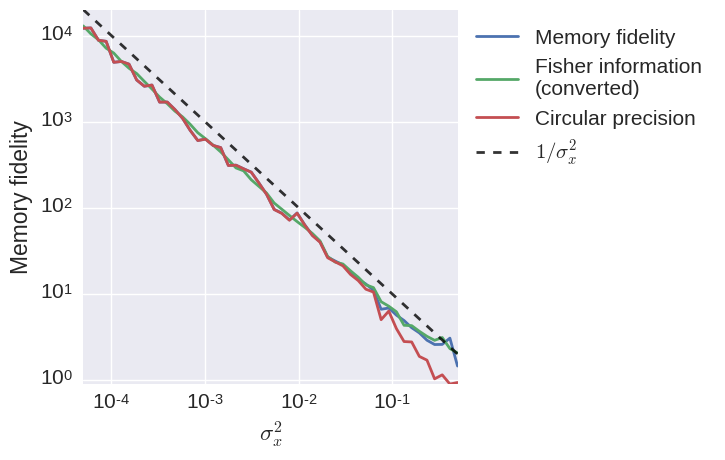

In [114]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axes = [axes]

axes[0].loglog(sigmax2_space, mem_fidelities)
axes[0].loglog(sigmax2_space, fisherinfos/2.)
axes[0].loglog(sigmax2_space, precisions)
axes[0].loglog(sigmax2_space, sigmax2_space**-1., 'k--', alpha=0.8)
axes[0].set_xlabel('$\sigma_x^2$')
axes[0].set_ylabel('Memory fidelity')
axes[0].legend(["Memory fidelity", "Fisher information \n(converted)", "Circular precision", "$1/\sigma_x^2$"], 
               loc='upper left', bbox_to_anchor=(1, 1))
axes[0].autoscale(enable=True, tight=True)

# axes[1].loglog(sigmax2_space, fisherinfos/2., 'g')
# axes[1].loglog(sigmax2_space, sigmax2_space**-1., 'g--')
# axes[1].set_xlabel('$\sigma_x^2$')
# axes[1].set_ylabel('Fisher Information')
# axes[1].legend(["Fisher Information", "$1/\sigma_x^2$"])
# axes[1].autoscale(enable=True, tight=True)

plt.tight_layout()

f.savefig(dataio.create_formatted_filename("encoding_noise_effect_{label}_{unique_id}.pdf"), bbox_inches='tight')

# Relation between M and conjunctivity ratio

2D plots, as requested by a reviewer.

These are in [this notebook](../fisherinfo_new_2016/notebook_fisher_random_large_2try_310816.ipynb), in the middle.